Dataset Loaded:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Column Names in the Dataset:
Index(['CustomerID', 'CustomerName', 'Region', 'SignupDate'], dtype='object')

Adding dummy columns 'TotalSpent' and 'TransactionCount' for testing.

Updated Dataset with Numeric Columns:
  CustomerID        CustomerName         Region  SignupDate  TotalSpent  \
0      C0001    Lawrence Carroll  South America  2022-07-10         528   
1      C0002      Elizabeth Lutz           Asia  2022-02-13         929   
2      C0003      Michael Rivera  South America  2024-03-07         172   
3      C0004  Kathleen Rodriguez  South America  2022-10-09         392   
4      C0005         Laura Webe

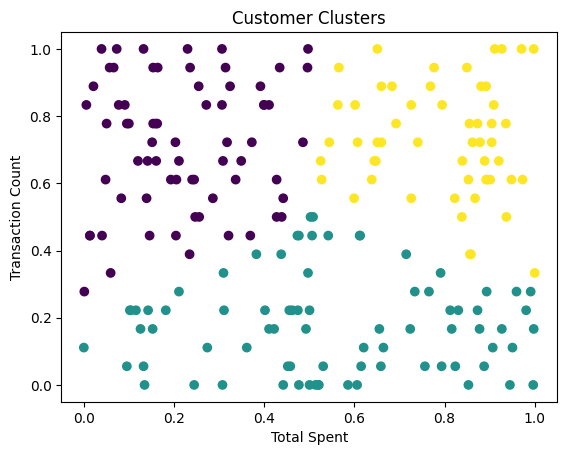


Cluster Assignments:
    CustomerID  Cluster
0        C0001        1
1        C0002        1
2        C0003        0
3        C0004        0
4        C0005        2
..         ...      ...
195      C0196        2
196      C0197        0
197      C0198        1
198      C0199        0
199      C0200        1

[200 rows x 2 columns]


In [7]:
# Import necessary libraries
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load your dataset (replace 'Customers.csv' with the actual file name)
customer_features = pd.read_csv("Customers.csv")

# Display the first few rows of the dataset
print("Dataset Loaded:")
print(customer_features.head())

# Step 1: Check column names
print("\nColumn Names in the Dataset:")
print(customer_features.columns)

# Step 2: Add necessary numeric columns if they are missing
if 'TotalSpent' not in customer_features.columns or 'TransactionCount' not in customer_features.columns:
    print("\nAdding dummy columns 'TotalSpent' and 'TransactionCount' for testing.")
    customer_features['TotalSpent'] = np.random.randint(100, 1000, size=len(customer_features))
    customer_features['TransactionCount'] = np.random.randint(1, 20, size=len(customer_features))

# Display the updated dataset
print("\nUpdated Dataset with Numeric Columns:")
print(customer_features.head())

# Step 3: Normalize the features
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(customer_features[['TotalSpent', 'TransactionCount']])
print("\nNormalized Features:")
print(scaled_features)

# Step 4: Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
customer_features["Cluster"] = kmeans.fit_predict(scaled_features)

# Step 5: Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(scaled_features, customer_features["Cluster"])
print("\nDavies-Bouldin Index:", db_index)

# Step 6: Visualize the clusters
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=customer_features["Cluster"], cmap="viridis")
plt.xlabel("Total Spent")
plt.ylabel("Transaction Count")
plt.title("Customer Clusters")
plt.show()

# Step 7: Check cluster assignments
print("\nCluster Assignments:")
print(customer_features[["CustomerID", "Cluster"]])
